In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# CSV 파일 읽어오기
nothing_data = pd.read_csv('nothing.csv', header=None)
wiznet_data = pd.read_csv('wiznet.csv', header=None)
you_data = pd.read_csv('you.csv', header=None)

In [3]:
# 데이터 병합 및 레이블 할당
data = np.vstack((nothing_data, wiznet_data, you_data))
labels = np.concatenate((np.zeros(len(nothing_data)), np.ones(len(wiznet_data)), np.ones(len(you_data))*2))

In [4]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# 입력 데이터 크기 확인
input_shape = X_train.shape[1]

In [5]:
# 모델 구성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
367/367 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8389 - val_loss: 0.4444 - val_accuracy: 0.8355
Epoch 2/50
367/367 [==============================] - 0s 956us/step - loss: 0.4312 - accuracy: 0.8408 - val_loss: 0.4233 - val_accuracy: 0.8478
Epoch 3/50
367/367 [==============================] - 0s 958us/step - loss: 0.4293 - accuracy: 0.8394 - val_loss: 0.4368 - val_accuracy: 0.8413
Epoch 4/50
367/367 [==============================] - 0s 943us/step - loss: 0.4294 - accuracy: 0.8408 - val_loss: 0.4339 - val_accuracy: 0.8420
Epoch 5/50
367/367 [==============================] - 0s 969us/step - loss: 0.4313 - accuracy: 0.8400 - val_loss: 0.4252 - val_accuracy: 0.8423
Epoch 6/50
367/367 [==============================] - 0s 994us/step - loss: 0.4291 - accuracy: 0.8383 - val_loss: 0.4667 - val_accuracy: 0.8263
Epoch 7/50
367/367 [==============================] - 0s 956us/step - loss: 0.4260 - accuracy: 0.8418 - val_loss: 0.4530 - val_accuracy: 0

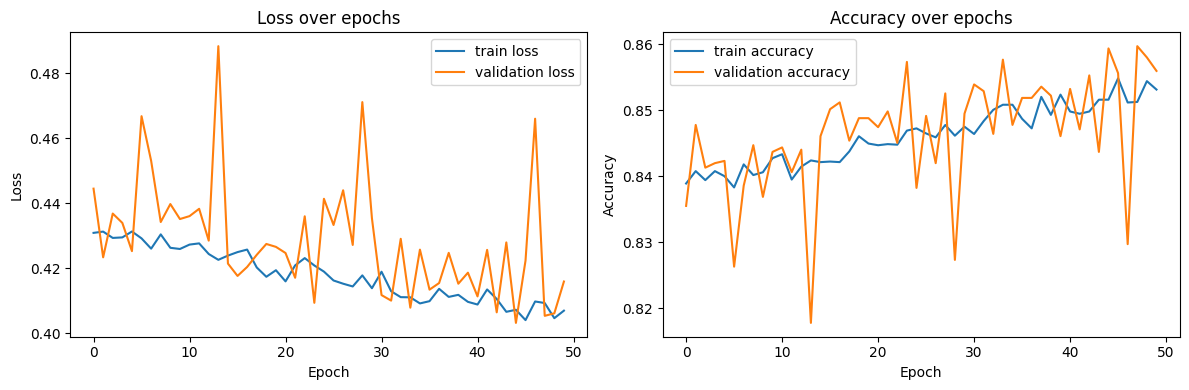

In [13]:
# 손실 그래프 그리기
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# 정확도 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [14]:
# TensorFlow Lite 변환
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\Acorn\AppData\Local\Temp\tmpnl2ud37n\assets


INFO:tensorflow:Assets written to: C:\Users\Acorn\AppData\Local\Temp\tmpnl2ud37n\assets


In [15]:
# TensorFlow Lite 모델 저장
with open('voice_recognition_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [16]:
def representative_dataset_gen():
    for i in range(len(X_train)):
        yield [X_train[i].astype(np.float32)]

In [17]:
# TensorFlow Lite 변환 및 완전 정수 양자화
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_quant_model = converter.convert()

# 완전 정수 양자화된 TensorFlow Lite 모델 저장
with open('voice_recognition_model_quant.tflite', 'wb') as f:
    f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: C:\Users\Acorn\AppData\Local\Temp\tmp_15mwl0k\assets


INFO:tensorflow:Assets written to: C:\Users\Acorn\AppData\Local\Temp\tmp_15mwl0k\assets
c:\Users\Acorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


: 